<a href="https://colab.research.google.com/github/karthik-k-18/Credit-Card-Fraud-Detection/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import the necessary packages
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier

<Figure size 432x216 with 0 Axes>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [ ]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
print(data.shape)

(284807, 31)


In [ ]:
print(data.describe())


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [ ]:
feature_names = data.iloc[:, 1:30].columns
target = data.iloc[:1, 30:].columns

data_features = data[feature_names]
data_target = data[target]

Done upto here for first project evaluation

Now We will try different models and their accuracies.

In [ ]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, 
                                                    train_size = 0.75, test_size = 0.25, random_state = 1)

Before spilitting the data into training and testing data we have to maintain one dependent and independent variables X and Y respectively.

# Logistic Regression 

In [ ]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
prediction = logistic_reg.predict(X_test)

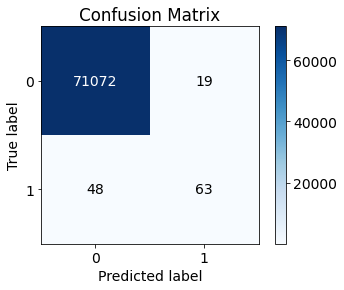

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, prediction)

In [ ]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, prediction)))

Accuracy score of the Logistic Regression model is 0.9990590151962023


In [ ]:
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.77      0.57      0.65       111

    accuracy                           1.00     71202
   macro avg       0.88      0.78      0.83     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, prediction)))

F1 score of the Logistic Regression model is 0.6528497409326425


using  undersampling technique for data balancing

In [ ]:
fraud_records = len(data[data.Class == 1])

In [ ]:
fraud_indices = data[data.Class == 1].index
not_fraud_indices = data[data.Class == 0].index

# Randomly collect equal samples of each type:
under_sample_indices = np.random.choice(not_fraud_indices, fraud_records, False)
data_undersampled = data.iloc[np.concatenate([fraud_indices, under_sample_indices]),:]
X_undersampled = data_undersampled.iloc[:,1:30]
Y_undersampled = data_undersampled.Class
X_undersampled_train, X_undersampled_test, Y_undersampled_train, Y_undersampled_test = train_test_split(X_undersampled, Y_undersampled, test_size = 0.30)

In [ ]:
undersampled_logistic_reg = LogisticRegression()
undersampled_logistic_reg.fit(X_undersampled_train,Y_undersampled_train)
prediction=undersampled_logistic_reg.predict(X_undersampled_test)

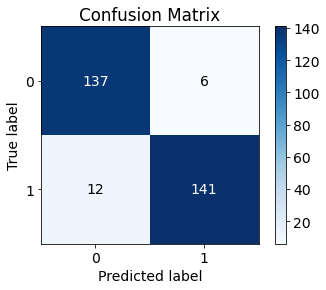

In [ ]:
skplt.metrics.plot_confusion_matrix( Y_undersampled_test, prediction)

In [ ]:
print('Accuracy score of the Logistic Regression model after using undersampling for balanced data is {}'.format(accuracy_score(Y_undersampled_test, prediction)))

Accuracy score of the Logistic Regression model after using undersampling for balanced data is 0.9391891891891891


In [ ]:
print('F1 score of the Logistic Regression model after using undersampling  for balanced data is {}'.format(f1_score(Y_undersampled_test, prediction)))

F1 score of the Logistic Regression model after using undersampling  for balanced data is 0.9400000000000001


Using the "new" classifier for the original data test

In [ ]:
undersampled_logistic_reg = LogisticRegression()
undersampled_logistic_reg.fit(X_undersampled_train,Y_undersampled_train)
prediction=undersampled_logistic_reg.predict(X_test)

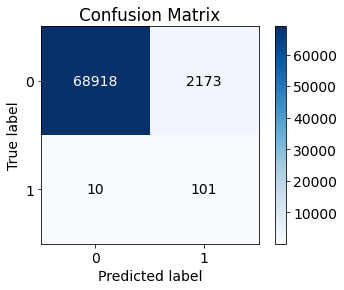

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, prediction)

In [ ]:
print('Accuracy score of the Logistic Regression model after using undersampling for original dataset is {}'.format(accuracy_score(y_test, prediction)))

Accuracy score of the Logistic Regression model after using undersampling for original dataset is 0.9693407488553692


In [ ]:
print('F1 score of the Logistic Regression model after using undersampling for original dataset is {}'.format(f1_score(y_test, prediction)))

F1 score of the Logistic Regression model after using undersampling for original dataset is 0.08469601677148847


In [ ]:
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71091
           1       0.04      0.91      0.08       111

    accuracy                           0.97     71202
   macro avg       0.52      0.94      0.53     71202
weighted avg       1.00      0.97      0.98     71202



#            Decision Tree

In [ ]:
DT = DecisionTreeClassifier(max_depth = 12, criterion = 'entropy')
DT.fit(X_train, y_train)
prediction = DT.predict(X_test)

In [ ]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, prediction)))

Accuracy score of the Decision Tree model is 0.9991854161399961


In [ ]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, prediction)))

F1 score of the Decision Tree model is 0.7387387387387387


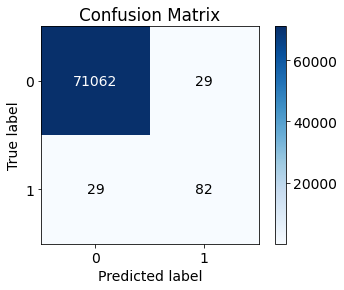

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, prediction)

In [ ]:
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.74      0.74      0.74       111

    accuracy                           1.00     71202
   macro avg       0.87      0.87      0.87     71202
weighted avg       1.00      1.00      1.00     71202



# Random Forest

In [ ]:
random_forest = RandomForestClassifier(max_depth = 20)
random_forest.fit(X_train, y_train)
prediction = random_forest.predict(X_test)

In [ ]:
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, prediction)))

Accuracy score of the Random Forest model is 0.999522485323446


In [ ]:
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, prediction)))

F1 score of the Random Forest model is 0.8472906403940887


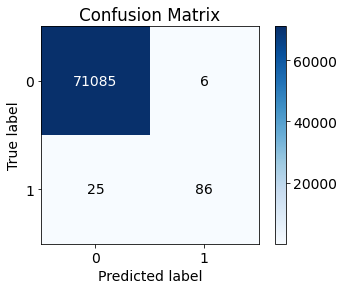

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, prediction)

In [ ]:
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.93      0.77      0.85       111

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202



To Do for Third Project Evaluation
1) Support Vector Machines
2) K-Nearest-Neighbours
3) XGBoost

# Support Vector Machines

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
prediction = svm.predict(X_test)

In [ ]:
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test, prediction)))

Accuracy score of the Support Vector Machines model is 0.9987781242099941


In [ ]:
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_test, prediction)))

F1 score of the Support Vector Machines model is 0.4458598726114649


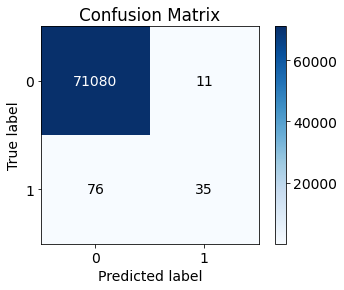

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, prediction)

In [ ]:
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.76      0.32      0.45       111

    accuracy                           1.00     71202
   macro avg       0.88      0.66      0.72     71202
weighted avg       1.00      1.00      1.00     71202



# XGBoost

In [ ]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
prediction = xgb.predict(X_test)

In [ ]:
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, prediction)))

Accuracy score of the XGBoost model is 0.999522485323446


In [ ]:
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, prediction)))

F1 score of the XGBoost model is 0.8316831683168316


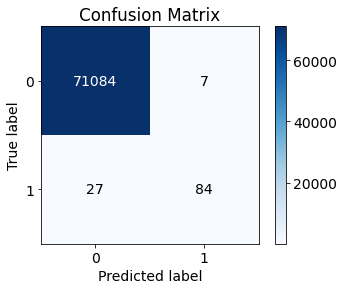

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, prediction)

In [ ]:
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.92      0.76      0.83       111

    accuracy                           1.00     71202
   macro avg       0.96      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202

